In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gemstones-images/test/Alexandrite/alexandrite_18.jpg
/kaggle/input/gemstones-images/test/Alexandrite/alexandrite_6.jpg
/kaggle/input/gemstones-images/test/Alexandrite/alexandrite_3.jpg
/kaggle/input/gemstones-images/test/Alexandrite/alexandrite_28.jpg
/kaggle/input/gemstones-images/test/Coral/coral_9.jpg
/kaggle/input/gemstones-images/test/Coral/coral_18.jpg
/kaggle/input/gemstones-images/test/Coral/coral_3.jpg
/kaggle/input/gemstones-images/test/Coral/coral_28.jpg
/kaggle/input/gemstones-images/test/Bixbite/bixbite_3.jpg
/kaggle/input/gemstones-images/test/Bixbite/bixbite_9.jpg
/kaggle/input/gemstones-images/test/Bixbite/bixbite_4.jpg
/kaggle/input/gemstones-images/test/Bixbite/bixbite_6.jpg
/kaggle/input/gemstones-images/test/Lapis Lazuli/lapis lazuli_28.jpg
/kaggle/input/gemstones-images/test/Lapis Lazuli/lapis lazuli_3.jpg
/kaggle/input/gemstones-images/test/Lapis Lazuli/lapis lazuli_9.jpg
/kaggle/input/gemstones-images/test/Lapis Lazuli/lapis lazuli_18.jpg
/kaggle/in

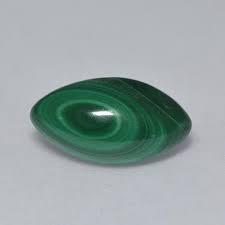

In [12]:
import tensorflow as tf

# Create train and test dir paths
train_data_dir = "/kaggle/input/gemstones-images/train/"
test_data_dir = "/kaggle/input/gemstones-images/test/"

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img = load_img(f"{train_data_dir}Malachite/malachite_15.jpg")
X = img_to_array(img)/255  # We divide the pixel value by 255 to end up between 0 and 1

img

In [13]:
x.shape

(400, 400, 3)

In [8]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks
from tensorflow.keras.utils import image_dataset_from_directory

In [42]:
model = Sequential()

model.add(layers.Input((400, 400, 3)))

model.add(layers.Flatten())

model.add(layers.Dense(87, activation="softmax"))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 480000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 87)                  │      41,760,087 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,760,087 (159.30 MB)

 Trainable params: 41,760,087 (159.30 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

batch_size = 64

# Create a training dataset
train_ds = image_dataset_from_directory(
    train_data_dir,
    labels="inferred",
    label_mode="categorical",
    seed=123,
    image_size=(400, 400),
    batch_size=batch_size
)

# We define a second one for the test data

val_ds = image_dataset_from_directory(
    test_data_dir,
    labels="inferred",
    label_mode="categorical",
    seed=123,
    image_size=(400, 400),
    batch_size=batch_size
)

Found 2856 files belonging to 87 classes.
Found 363 files belonging to 87 classes.


In [17]:
class_names = train_ds.class_names
print(class_names)

['Alexandrite', 'Almandine', 'Amazonite', 'Amber', 'Amethyst', 'Ametrine', 'Andalusite', 'Andradite', 'Aquamarine', 'Aventurine Green', 'Aventurine Yellow', 'Benitoite', 'Beryl Golden', 'Bixbite', 'Bloodstone', 'Blue Lace Agate', 'Carnelian', 'Cats Eye', 'Chalcedony', 'Chalcedony Blue', 'Chrome Diopside', 'Chrysoberyl', 'Chrysocolla', 'Chrysoprase', 'Citrine', 'Coral', 'Danburite', 'Diamond', 'Diaspore', 'Dumortierite', 'Emerald', 'Fluorite', 'Garnet Red', 'Goshenite', 'Grossular', 'Hessonite', 'Hiddenite', 'Iolite', 'Jade', 'Jasper', 'Kunzite', 'Kyanite', 'Labradorite', 'Lapis Lazuli', 'Larimar', 'Malachite', 'Moonstone', 'Morganite', 'Onyx Black', 'Onyx Green', 'Onyx Red', 'Opal', 'Pearl', 'Peridot', 'Prehnite', 'Pyrite', 'Pyrope', 'Quartz Beer', 'Quartz Lemon', 'Quartz Rose', 'Quartz Rutilated', 'Quartz Smoky', 'Rhodochrosite', 'Rhodolite', 'Rhodonite', 'Ruby', 'Sapphire Blue', 'Sapphire Pink', 'Sapphire Purple', 'Sapphire Yellow', 'Scapolite', 'Serpentine', 'Sodalite', 'Spessartite

In [44]:
history = model.fit(
        train_ds,
        epochs=5,
        validation_data=val_ds,
        )

Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 38s 814ms/step - accuracy: 0.0174 - loss: 3223.3542 - val_accuracy: 0.0275 - val_loss: 2648.8015
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 39s 862ms/step - accuracy: 0.0422 - loss: 2038.3262 - val_accuracy: 0.0744 - val_loss: 830.9117
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 36s 802ms/step - accuracy: 0.0998 - loss: 663.5317 - val_accuracy: 0.1047 - val_loss: 535.7484
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 36s 799ms/step - accuracy: 0.1375 - loss: 661.1664 - val_accuracy: 0.1157 - val_loss: 698.5472
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 36s 796ms/step - accuracy: 0.1605 - loss: 618.2657 - val_accuracy: 0.1267 - val_loss: 805.7447


In [52]:
from tensorflow.keras.preprocessing import image

img_path = '/kaggle/input/gemstones-images/test/Coral/coral_18.jpg'
img = image.load_img(img_path, target_size=(400, 400))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Add an extra batch dimension since the model expects batches of input
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

class_names = train_ds.class_names
predicted_class = np.argmax(prediction[0])
predicted_label = class_names[predicted_class]

print(f"Predicted class: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted class: Kunzite
